In [1]:
data_file = open("C:/Users/Lenovo/Desktop/Andrew-NG/mnist_database/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [2]:
len(data_list)

100

In [3]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [4]:
import numpy
import matplotlib.pyplot
%matplotlib inline

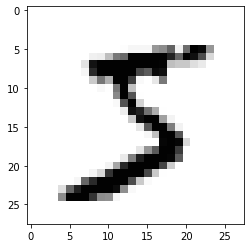

In [5]:
all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')

In [6]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [7]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [8]:
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [9]:
#making your own neural network
#3 layer neural network, learining MNIST dataset
import numpy
#for sigmoid function 
import scipy.special
#for plotting arrays
import matplotlib.pyplot
#ensure the plots are inside this notebook, not an external window
%matplotlib inline

class neuralNetwork:
    
    def __init__ (self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices wih and who
        #weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        #w11 w21 w12 w22
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        #learinign rate
        self.lr = learningrate
        
        #activation function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    
    def train(self, inputs_list, targets_list):
        #input list into 2-d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #signal into hidden layer 
        hidden_inputs = numpy.dot(self.wih, inputs)
        #signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #similar for final layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #output layer error = (target- actual)
        output_errors = targets - final_outputs
        
        #hidden layer errors = output_errors , split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        #update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    # query the neural network
    def query(self, inputs_list):
       # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
      # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
     # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
      # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
      # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    

    

In [10]:
    
    inputnodes = 784
    hiddennodes = 200
    outputnodes = 10
    
    learningrate = 0.1
    
    #creating an instance of neural network
    n = neuralNetwork (inputnodes, hiddennodes, outputnodes, learningrate)
    
    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()
    
    #train the neural network
    epochs = 5
    for e in range(epochs):
        #split the record by commas
        for record in training_data_list:
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(outputnodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
        pass
        
    
    
        
        

In [11]:
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[0].split(',')
print(all_values[0])
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

7


array([[0.0120284 ],
       [0.00361685],
       [0.00948914],
       [0.00505654],
       [0.01201301],
       [0.00756055],
       [0.01736974],
       [0.98224256],
       [0.00681173],
       [0.02521786]])

In [12]:
#testing the neural network
#scorecard 
scorecard = []
sums = 0

#going through all records in test dataset
for record in test_data_list:
    #spliting by comma
    all_values = record.split(',')
    #correct answer is first value
    correct_label = int(all_values[0])
    #print( "correct label", correct_label)
    #scaling and shifting the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    #query the network
    outputs = n.query(inputs)
    #index of highest value corresponds to the label, as we have defined index as 0,1,2 hence index is the answer
    label = numpy.argmax(outputs)
    #print( "network's answer", label)
    
    #append correct or incorrect to list
    if(label == correct_label):
        scorecard.append(1)
        sums = sums + 1
    else:
        scorecard.append(0)
        pass
    pass
print("performance", sums/len(scorecard) * 100, "%")

performance 97.31 %
